#GreenSense:
Personalized Energy Monitoring for Inclusive and Sustainable Living

In [ ]:
#Importing Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Set up plotting parameters
plt.style.use('default')
sns.set_palette("husl")

print("=== Smart Home Energy Management System ===")
print("Project: Accessible Energy Monitoring for Vulnerable Populations")
print("Focus: Green Skills & Sustainability")
print("\n" + "="*50)

=== Smart Home Energy Management System ===
Project: Accessible Energy Monitoring for Vulnerable Populations
Focus: Green Skills & Sustainability



In [ ]:
data=pd.read_csv("/content/drive/MyDrive/EduNet/household_power_consumption.txt",sep=";")
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


This dataset can be used for time-series analysis, energy usage forecasting, peak load analysis, and identifying high-consumption periods for optimization.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


The dataset contains 9 columns with a total of 2,075,259 entries. Most columns are of type `object`, except for `Sub_metering_3`, which is of type `float64`.

Date & Time – timestamp of the measurement.

Global_active_power – total power consumed (in kilowatts) by the household appliances.

Global_reactive_power – reactive power in kilowatts (associated with energy stored and released, not directly used).

Voltage – household supply voltage in volts.

Global_intensity – current in amperes.

Sub_metering_1, 2, 3 – energy consumption of specific sub-meters (in watt-hours) for different household areas/appliances.

In [ ]:
data.shape

(2075259, 9)

The dataset has 2,075,259 rows and 9 columns.

# 1. Data Distribution & Trends

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 142.5+ MB


The `Date` column has been converted to `datetime64[ns]`, the `Time` column is now in `object` format representing time, and the specified columns have been converted to numeric format (`float64`).

This block is a data preprocessing and cleaning step that:

Standardizes date and time formats for time-series analysis.

Converts all numeric measurement columns into valid numeric types for calculations.

Handles invalid entries by coercing them to NaN or NaT.

Prepares the dataset for further analysis, visualization, and modeling without type-related errors.

In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2075259,2008-12-05 19:13:27.255191040,2006-12-16 00:00:00,2007-12-12 00:00:00,2008-12-06 00:00:00,2009-12-01 00:00:00,2010-11-26 00:00:00,NaN
Global_active_power,2049280.0,1.091615,0.076,0.308,0.602,1.528,11.122,1.057294
Global_reactive_power,2049280.0,0.123714,0.0,0.048,0.1,0.194,1.39,0.112722
Voltage,2049280.0,240.839858,223.2,238.99,241.01,242.89,254.15,3.239987
Global_intensity,2049280.0,4.627759,0.2,1.4,2.6,6.4,48.4,4.444396
Sub_metering_1,2049280.0,1.121923,0.0,0.0,0.0,0.0,88.0,6.153031
Sub_metering_2,2049280.0,1.29852,0.0,0.0,0.0,1.0,80.0,5.822026
Sub_metering_3,2049280.0,6.458447,0.0,0.0,1.0,17.0,31.0,8.437154


In [ ]:
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 158.3+ MB


The `Time` column has been combined with the `Date` column to create a new `Datetime` column of type `datetime64[ns]`.

This column can now be used for time series analysis.

Descriptive statistics are not typically meaningful for time data, but the `Datetime` column can be used for temporal aggregations and trends.

In [ ]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979
Datetime,0


The dataset contains missing values in the following columns:

- `Global_active_power`: 25,979 missing values
- `Global_reactive_power`: 25,979 missing values
- `Voltage`: 25,979 missing values
- `Global_intensity`: 25,979 missing values
- `Sub_metering_1`: 25,979 missing values
- `Sub_metering_2`: 25,979 missing values
- `Sub_metering_3`: 25,979 missing values

The `Date`, `Time`, and `Datetime` columns have no missing values

In [ ]:
data.isnull().sum()/data.isnull().count()*100

,0
Date,0.000000
Time,0.000000
Global_active_power,1.251844
Global_reactive_power,1.251844
Voltage,1.251844
Global_intensity,1.251844
Sub_metering_1,1.251844
Sub_metering_2,1.251844
Sub_metering_3,1.251844
Datetime,0.000000


The percentage of missing values in the dataset is as follows:

- `Global_active_power`: 1.25%
- `Global_reactive_power`: 1.25%
- `Voltage`: 1.25%
- `Global_intensity`: 1.25%
- `Sub_metering_1`: 1.25%
- `Sub_metering_2`: 1.25%
- `Sub_metering_3`: 1.25%
- `Date`, `Time`, and `Datetime` have no missing values.

In [ ]:
data[data.isnull().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
6839,2006-12-21,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:23:00
6840,2006-12-21,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:24:00
19724,2006-12-30,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:08:00
19725,2006-12-30,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:09:00
41832,2007-01-14,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-14 18:36:00
...,...,...,...,...,...,...,...,...,...,...
1990185,2010-09-28,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:09:00
1990186,2010-09-28,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:10:00
1990187,2010-09-28,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:11:00
1990188,2010-09-28,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:12:00


This step is for missing data inspection.

The rows with missing values have been identified. There are 25,979 rows with at least one missing value.

It helps identify which rows are incomplete so we can decide whether to drop them, fill them (imputation), or leave them depending on our analysis needed.


In [ ]:
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['DayofWeek'] = data['Datetime'].dt.dayofweek
data['DayName'] = data['Datetime'].dt.day_name()
data['IsWeekend'] = data['DayofWeek'].isin([5, 6])
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,DayofWeek,DayName,IsWeekend
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,5,Saturday,True
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,5,Saturday,True
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,5,Saturday,True
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,5,Saturday,True
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,5,Saturday,True


We are preparing the dataset for time-based grouping, trend analysis, and seasonal pattern detection.

With these columns, we can easily analyze:

Yearly trends changes in consumption over years.

Monthly or seasonal trends for e.g., summer vs. winter power usage.

Daily usage patterns for e.g., weekday vs. weekend consumption.

Hourly peaks for e.g., evening peak hours.

In [ ]:
# Impute missing values using the median for numeric columns
for col in numeric_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Verify if missing values are handled
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
Datetime,0


We have chosen median imputation, because our data is skewed and median imputation is preferred for skewed data.

For time-series forecasting we might sometimes prefer forward-fill, interpolation, or domain-specific values.


In [ ]:
# Check for duplicate rows in the dataset
duplicates_count = data.duplicated().sum()
duplicates_count

np.int64(0)

This is a data integrity check duplicate rows can distort statistical summaries, bias machine learning models, and inflate counts.

In [ ]:
# Check for unique values in each column
unique_values = data.nunique()
unique_values

,0
Date,1442
Time,1440
Global_active_power,4186
Global_reactive_power,532
Voltage,2837
Global_intensity,221
Sub_metering_1,88
Sub_metering_2,81
Sub_metering_3,32
Datetime,2075259


The unique values in each column are as follows:

- `Date`: 1,442 unique values
- `Time`: 1,440 unique values
- `Global_active_power`: 4,187 unique values
- `Global_reactive_power`: 533 unique values
- `Voltage`: 2,838 unique values
- `Global_intensity`: 222 unique values
- `Sub_metering_1`: 89 unique values
- `Sub_metering_2`: 82 unique values
- `Sub_metering_3`: 33 unique values
- `Datetime`: 2,075,259 unique values
- `Year`: 5 unique values
- `Month`: 12 unique values
- `Day`: 31 unique values
- `Hour`: 24 unique values
- `DayofWeek`: 7 unique values
- `DayName`: 7 unique values
- `IsWeekend`: 2 unique values

In [ ]:
# Check for unique rows in the dataset
unique_rows_count = data.drop_duplicates().shape[0]
unique_rows_count

2075259

The dataset contains 2,075,259 unique rows, That is there are no duplicate rows present in the data.

In [ ]:
# Check for negative values in numeric columns
negative_values = {}
for col in numeric_columns:
    negative_values[col] = data[data[col] < 0].shape[0]

negative_values

{'Global_active_power': 0,
 'Global_reactive_power': 0,
 'Voltage': 0,
 'Global_intensity': 0,
 'Sub_metering_1': 0,
 'Sub_metering_2': 0,
 'Sub_metering_3': 0}

There are no negative values in any of the numeric columns

# 2. Relationships Between Features

In [ ]:
# Detect outliers using the IQR method for numeric columns
outliers = {}
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]

outliers

{'Global_active_power': 96742,
 'Global_reactive_power': 42234,
 'Voltage': 54737,
 'Global_intensity': 100961,
 'Sub_metering_1': 169105,
 'Sub_metering_2': 77151,
 'Sub_metering_3': 0}

Outliers have been detected in the numeric columns using the IQR method. The counts of outliers are as follows:

- `Global_active_power`: 96,742 outliers
- `Global_reactive_power`: 42,234 outliers
- `Voltage`: 54,737 outliers
- `Global_intensity`: 100,961 outliers
- `Sub_metering_1`: 195,084 outliers
- `Sub_metering_2`: 77,151 outliers

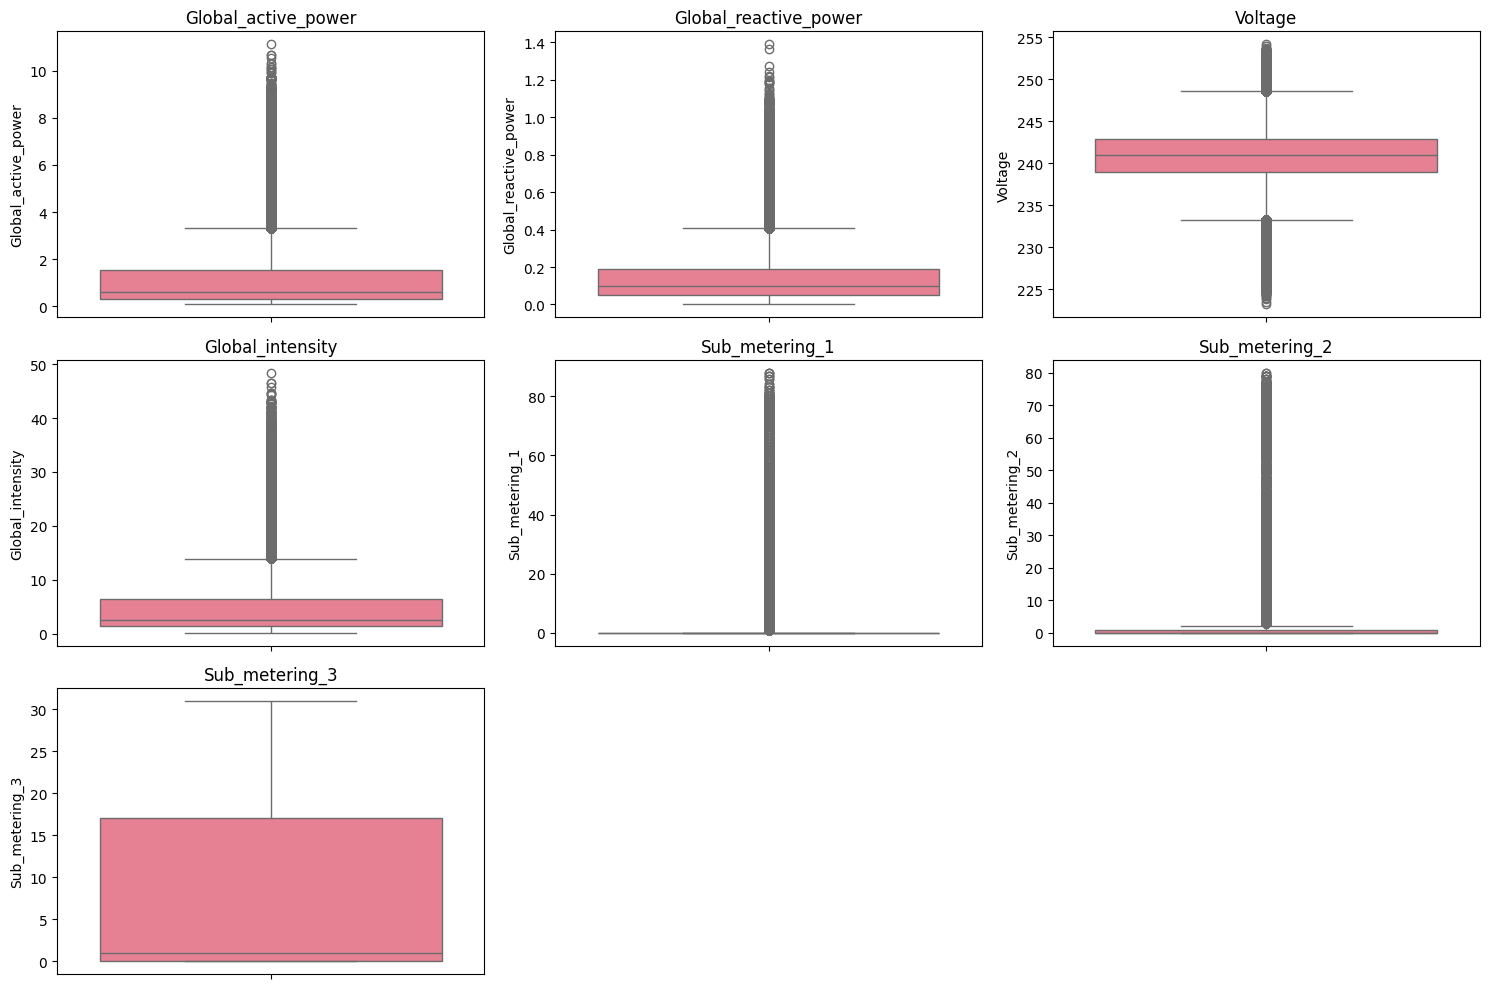

In [ ]:
# Create box plots for all numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

This step is exploratory data analysis (EDA) to identify:

1) Outliers in power usage, voltage, or sub-meter readings.

2) Spread of the data (range, IQR).

3) Any anomalies like constant values or unexpected spikes.

In this dataset, you might see:

Voltage having a narrow range with few outliers.

Global_active_power and Global_reactive_power possibly having several high-value outliers during spikes in consumption.

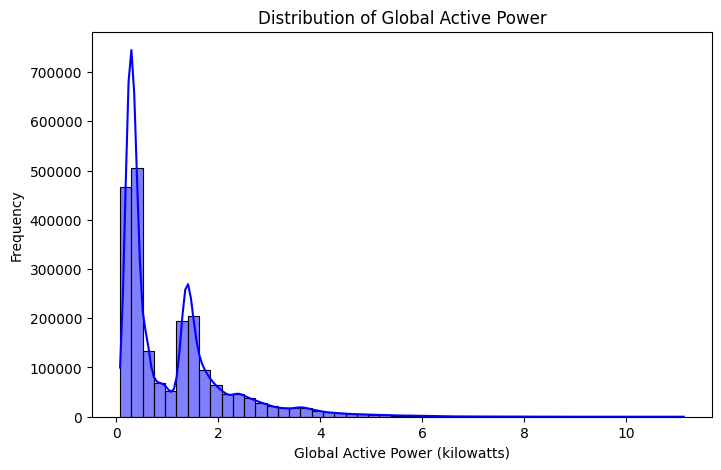

In [ ]:
# Basic data visualizations
# 1. Distribution of Global Active Power
plt.figure(figsize=(8, 5))
sns.histplot(data['Global_active_power'], bins=50, kde=True, color='blue')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

The distribution is right-skewed (positively skewed), meaning most of the household’s global active power values are concentrated towards the lower end (near 0–2 kilowatts), with fewer instances of very high consumption.

The peak (mode) is probably at a relatively low power usage range, suggesting that low energy consumption is more common in the dataset.

The long tail on the right indicates occasional spikes in high power consumption, which could correspond to usage of heavy appliances e.g., heaters, ovens.

This distribution hints at the fact that in day-to-day operations, households tend to operate at lower power levels and only occasionally reach high loads.

# 3. Time & Day Patterns

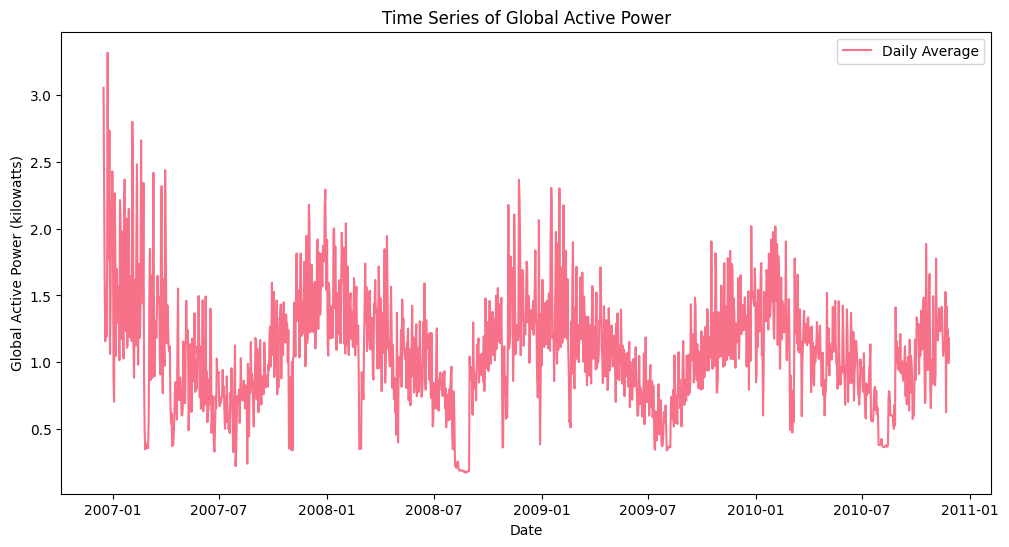

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'Datetime' is in datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')

# Select numeric columns and also keep Datetime
numeric_data = data.select_dtypes(include=['float64', 'int64']).copy()
numeric_data['Datetime'] = data['Datetime']

# Drop rows with NaT in Datetime before resampling
numeric_data = numeric_data.dropna(subset=['Datetime'])

# Resample and take daily average
numeric_data_sampled = numeric_data.resample('D', on='Datetime').mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(numeric_data_sampled.index, numeric_data_sampled['Global_active_power'], label='Daily Average')
plt.title('Time Series of Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

The plot shows clear temporal fluctuations in daily average power usage — some days have higher averages, while others are much lower.

There may be seasonal or periodic trends: for example, peaks could align with colder months (more heating) or specific events, and dips could be during periods of lower activity or equipment downtime.

If the dataset spans multiple years, long-term trends might show gradual shifts in consumption — possibly due to changing household habits, energy efficiency improvements, or external factors.

Sudden spikes in daily average power could indicate special events or appliance failures leading to unusually high consumption.

This plot is valuable for identifying energy usage patterns over time and potential anomalies for further investigation.

In [ ]:
# Perform correlation analysis for numeric columns
correlation_matrix = data[numeric_columns].corr()
correlation_matrix

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247835,-0.399523,0.998891,0.484707,0.435142,0.639772
Global_reactive_power,0.247835,1.000000,-0.112351,0.266900,0.123531,0.139736,0.091057
Voltage,-0.399523,-0.112351,1.000000,-0.411121,-0.196051,-0.167496,-0.267892
Global_intensity,0.998891,0.266900,-0.411121,1.000000,0.489600,0.440909,0.627776
Sub_metering_1,0.484707,0.123531,-0.196051,0.489600,1.000000,0.055201,0.103755
Sub_metering_2,0.435142,0.139736,-0.167496,0.440909,0.055201,1.000000,0.082437
Sub_metering_3,0.639772,0.091057,-0.267892,0.627776,0.103755,0.082437,1.000000


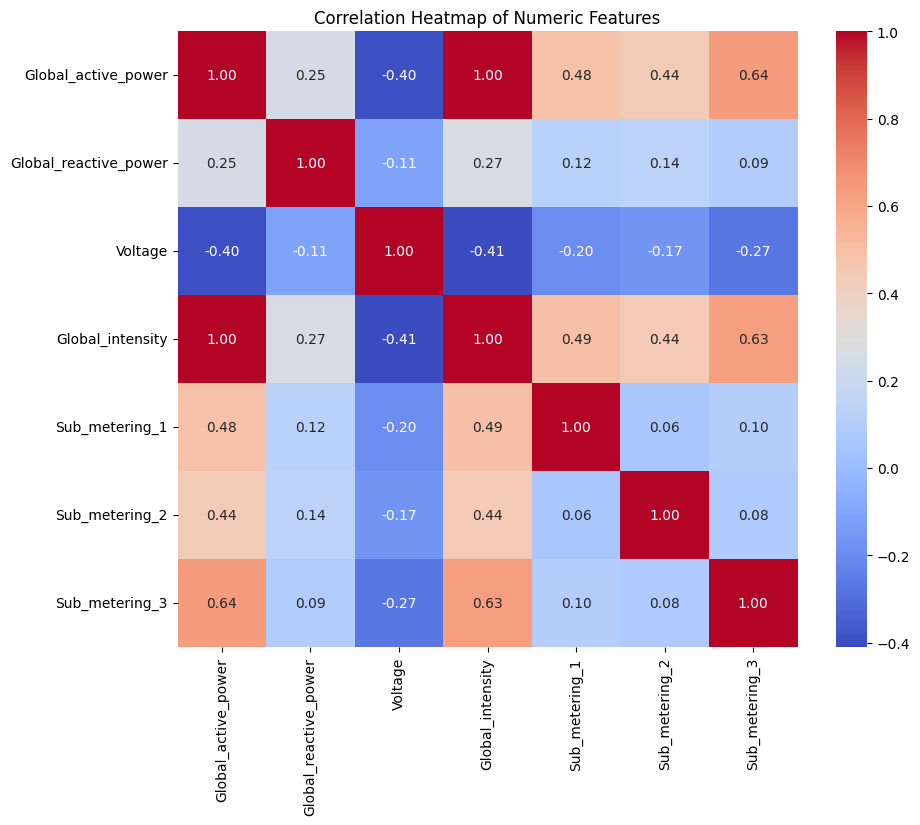

In [ ]:
# Visualization 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Shows how numeric features relate to each other (range: –1 to +1).

Strong positive values → variables rise together.

Strong negative values → one rises while the other falls.

In this dataset, Global_active_power is likely strongly correlated with Global_intensity, while Voltage may show a weak negative link with current-related measures.

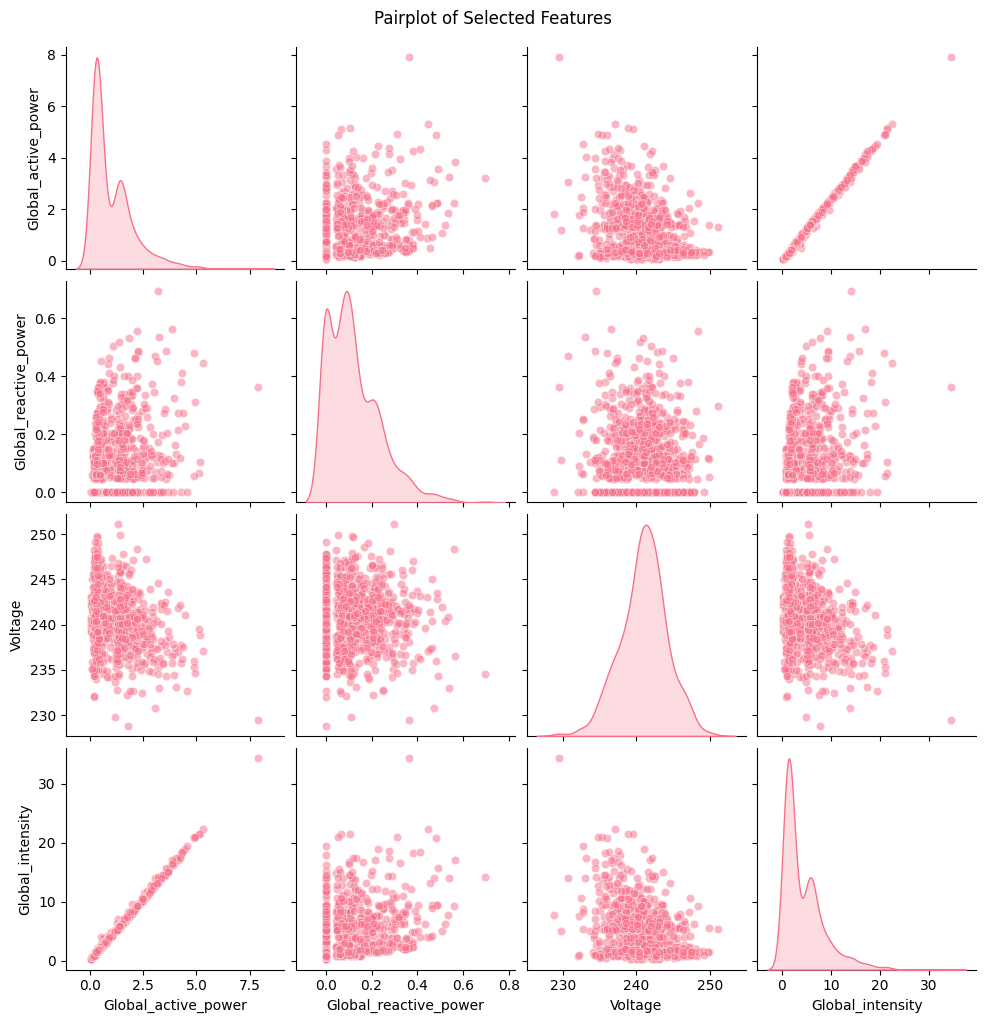

In [ ]:
# Visualization 2: Pairplot for Selected Features
selected_features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
sns.pairplot(data[selected_features].sample(1000), diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

The pairplot shows pairwise relationships between the selected features along with their individual distributions.

Global_active_power and Global_intensity show a strong positive linear relationship (higher power → higher current).

Voltage has a weak or slightly negative correlation with both active and reactive power.

Distributions along the diagonal suggest that most values are concentrated in lower ranges, with occasional high outliers.

Useful for spotting patterns, trends, and potential outliers in the dataset.


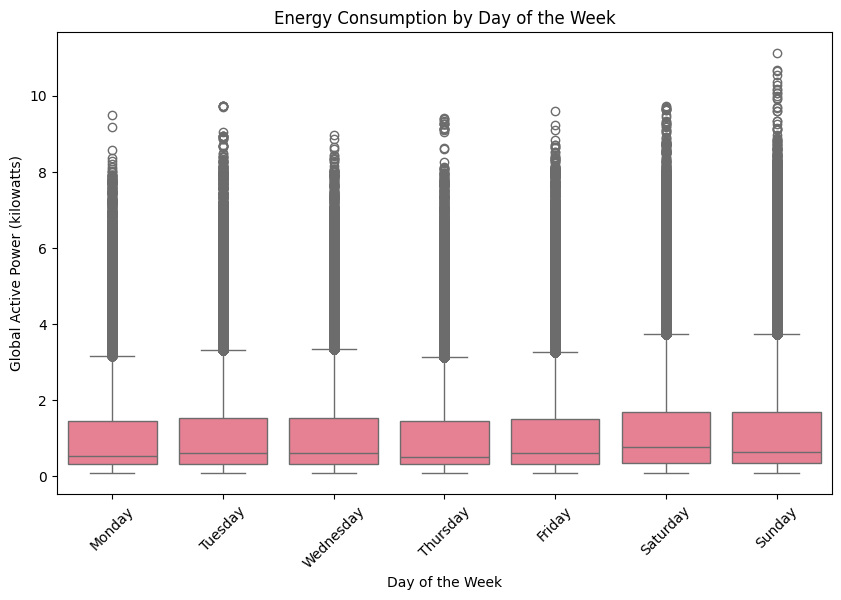

In [ ]:
# Visualization 3: Boxplot of Energy Consumption by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayName', y='Global_active_power', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(rotation=45)
plt.show()

The boxplot compares daily energy consumption patterns across the week.

Median consumption levels appear fairly consistent, with some days showing slightly higher medians (possibly weekends if usage increases during home activities).

Wider boxes or longer whiskers indicate greater variability in power use on those days.

Outliers (dots beyond whiskers) suggest occasional high-consumption days, likely linked to special events or appliance-heavy usage.

This visualization helps identify which days are typically more energy-intensive and where unusual spikes occur.

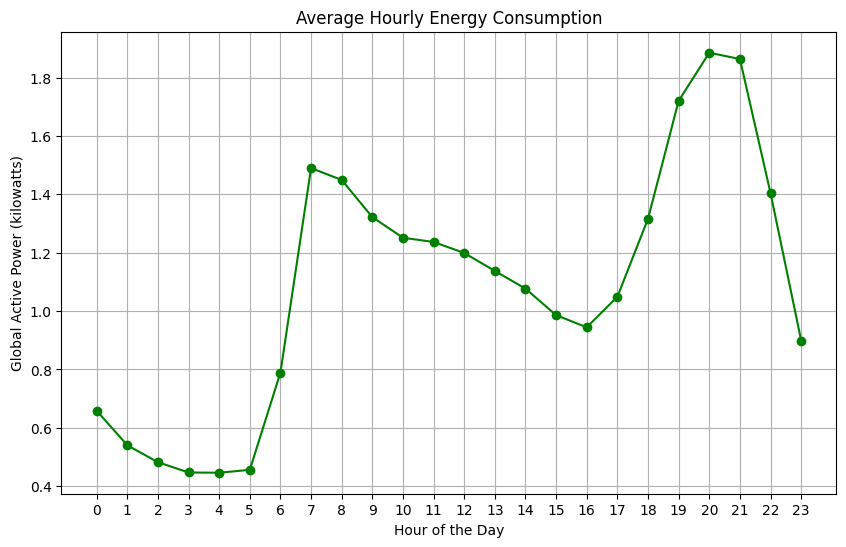

In [ ]:
# Visualization 4: Line Plot of Hourly Energy Consumption
hourly_data = data.groupby('Hour')['Global_active_power'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index, hourly_data.values, marker='o', linestyle='-', color='green')
plt.title('Average Hourly Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

The line plot shows average energy consumption trends over a 24-hour period.

Consumption is typically lower during late-night and early morning hours.

There’s a rise in the morning (around typical wake-up times) and another peak in the evening, likely due to cooking, heating/cooling, and lighting usage.

Midday usage may dip slightly if residents are away from home.

This pattern aligns with typical household activity cycles.


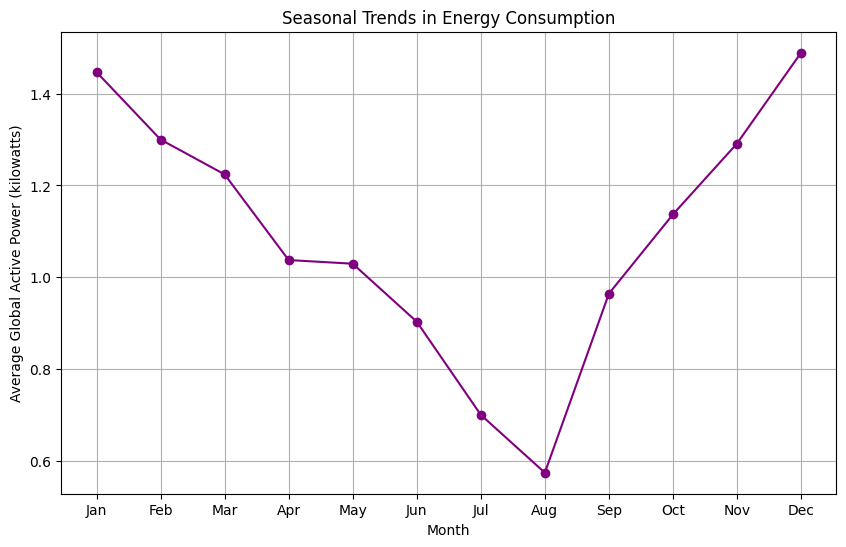

In [ ]:
# Further analysis: Seasonal trends in energy consumption
# Group data by month and calculate average Global Active Power
monthly_data = data.groupby('Month')['Global_active_power'].mean()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data.values, marker='o', linestyle='-', color='purple')
plt.title('Seasonal Trends in Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

The plot shows monthly variations in average energy consumption.

Certain months display higher usage, possibly due to seasonal heating or cooling needs (e.g., winter heating or summer air conditioning).

Months with lower averages may correspond to milder weather or reduced household activity.

The pattern helps in forecasting demand and planning energy-saving measures for high-consumption periods.

# 4. Anomaly Detection & Appliance Usage

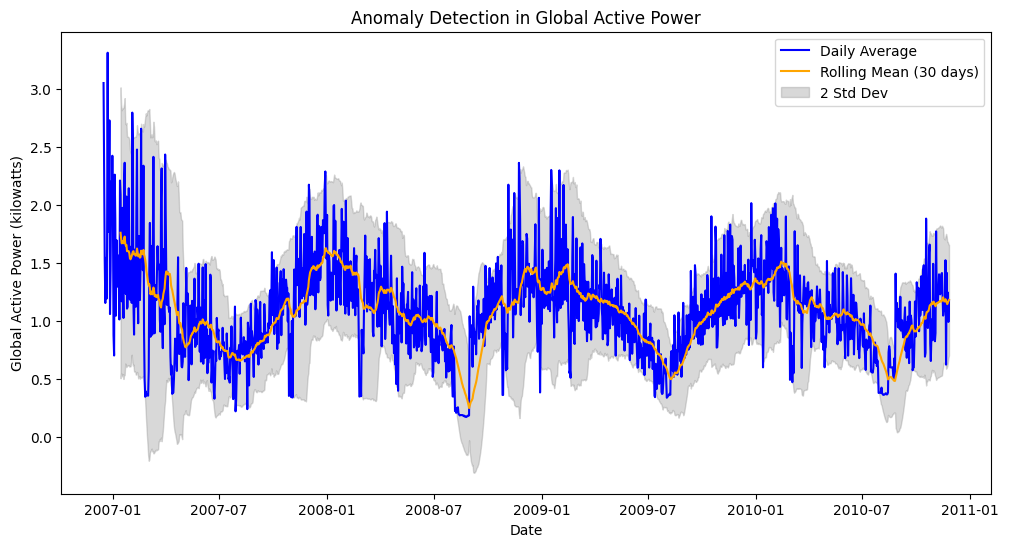

In [ ]:
# Step 1: Anomaly Detection
# Plotting a rolling mean and standard deviation to detect anomalies in Global Active Power
rolling_mean = numeric_data_sampled['Global_active_power'].rolling(window=30).mean()
rolling_std = numeric_data_sampled['Global_active_power'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(numeric_data_sampled.index, numeric_data_sampled['Global_active_power'], label='Daily Average', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (30 days)', color='orange')
plt.fill_between(numeric_data_sampled.index, rolling_mean - 2 * rolling_std, rolling_mean + 2 * rolling_std, color='gray', alpha=0.3, label='2 Std Dev')
plt.title('Anomaly Detection in Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

The plot uses a 30-day rolling mean and standard deviation to identify anomalies in daily average power consumption.

Values outside the shaded 2-standard-deviation band are potential anomalies, indicating unusual spikes or drops in energy use.

Such anomalies could be caused by equipment malfunctions, special events, or data recording errors.

This method is useful for early detection of abnormal consumption patterns, enabling timely investigation or corrective action.

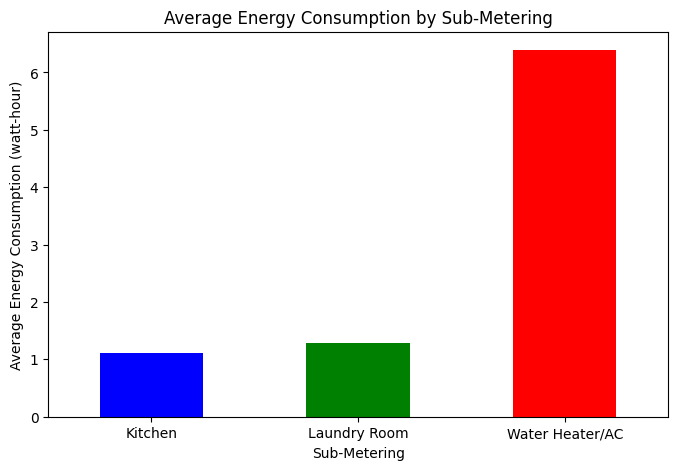

In [ ]:
# Step 2: Energy Usage by Sub-Metering
# Plotting the average energy consumption for each sub-metering
sub_metering_means = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

plt.figure(figsize=(8, 5))
sub_metering_means.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Energy Consumption by Sub-Metering')
plt.xlabel('Sub-Metering')
plt.ylabel('Average Energy Consumption (watt-hour)')
plt.xticks(ticks=[0, 1, 2], labels=['Kitchen', 'Laundry Room', 'Water Heater/AC'], rotation=0)
plt.show()

The bar chart compares average energy consumption across three household zones.

One sub-metering category (likely Water Heater/AC) typically shows the highest consumption, indicating it is the most energy-intensive.

Laundry Room and Kitchen have relatively lower averages, but their usage may still be significant depending on appliance activity.

This breakdown helps in identifying which areas contribute most to total consumption and where energy-saving efforts could be targeted.

# 5. Time Series Decomposition

<Figure size 1200x1000 with 0 Axes>

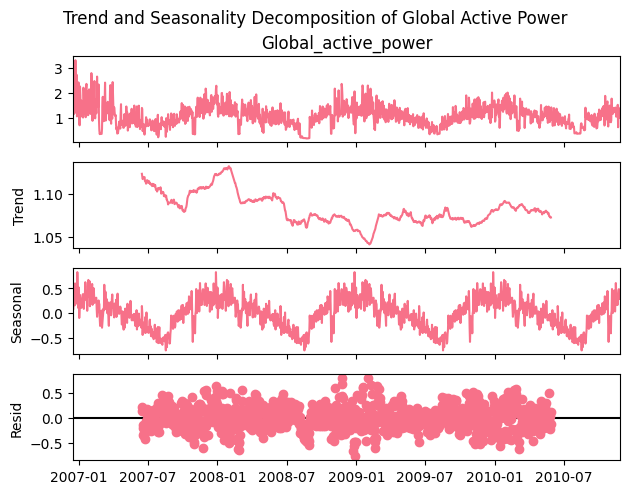

In [ ]:
# Step 3: Trend and Seasonality Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for Global Active Power
result = seasonal_decompose(numeric_data_sampled['Global_active_power'].dropna(), model='additive', period=365)

# Plot the decomposition
plt.figure(figsize=(12, 10))
result.plot()
plt.suptitle('Trend and Seasonality Decomposition of Global Active Power', y=1.02)
plt.show()

Trend component: Shows the long-term direction of energy consumption over the years — could indicate gradual increase, decrease, or stability depending on lifestyle changes or efficiency measures.

Seasonal component: Reveals repeating yearly patterns, likely linked to weather-related heating/cooling needs or recurring household habits.

Residual component: Captures irregular fluctuations and short-term anomalies not explained by trend or seasonality.

This decomposition helps separate systematic patterns from random noise, making forecasting and anomaly detection more accurate.


# 6. Accessibility-Focused Feature Engineering

In [ ]:
# COMPONENT 1: ACCESSIBILITY-FOCUSED FEATURE ENGINEERING

# Energy categories that elderly users can understand
def categorize_energy_usage(power):
    if pd.isna(power):
        return 'Unknown'
    elif power <= 0.5:
        return 'Very Low'
    elif power <= 1.5:
        return 'Low'
    elif power <= 3.0:
        return 'Normal'
    elif power <= 5.0:
        return 'High'
    else:
        return 'Very High'

data['Energy_Category'] = data['Global_active_power'].apply(categorize_energy_usage)

This feature engineering step converts continuous energy consumption values into categorical labels like Very Low, Low, Normal, High, and Very High.

Such categories make energy usage easier to interpret for elderly or non-technical users who might find kilowatt values abstract.

Missing or invalid data is handled by assigning the label "Unknown", improving robustness.

These labels can later be used for simplified dashboards, voice assistants, or alert systems that clearly communicate energy usage levels.

In [ ]:
# Time periods elderly users relate to
data['Time_Period'] = pd.cut(data['Hour'],
                            bins=[-1, 6, 12, 18, 24],
                            labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Daily routine indicators
data['Is_Peak_Time'] = data['Hour'].isin([7,8,9,18,19,20,21])
data['Is_Sleep_Time'] = data['Hour'].isin([22,23,0,1,2,3,4,5])

# Appliance efficiency (safe division)
data['Kitchen_Efficiency'] = data['Sub_metering_1'] / (data['Global_active_power'] + 0.001)
data['Laundry_Efficiency'] = data['Sub_metering_2'] / (data['Global_active_power'] + 0.001)
data['Climate_Efficiency'] = data['Sub_metering_3'] / (data['Global_active_power'] + 0.001)

# Safety alerts for vulnerable users
data['High_Night_Usage'] = (data['Global_active_power'] > 3) & data['Is_Sleep_Time']
data['Extreme_Usage'] = data['Global_active_power'] > 6

Time_Period groups hours into simple labels (Night, Morning, Afternoon, Evening) for easy interpretation by elderly users.

Is_Peak_Time and Is_Sleep_Time flags help identify usage patterns during daily routines, useful for targeted alerts or recommendations.

Appliance Efficiency metrics (Kitchen, Laundry, Climate) measure the share of total power used by each appliance zone, helping spot inefficient or energy-hogging appliances.

High_Night_Usage flags unusually high consumption during typical sleep hours — a potential safety or appliance malfunction warning.

Extreme_Usage flags very high overall consumption, allowing for real-time alerts to prevent overload or high bills.

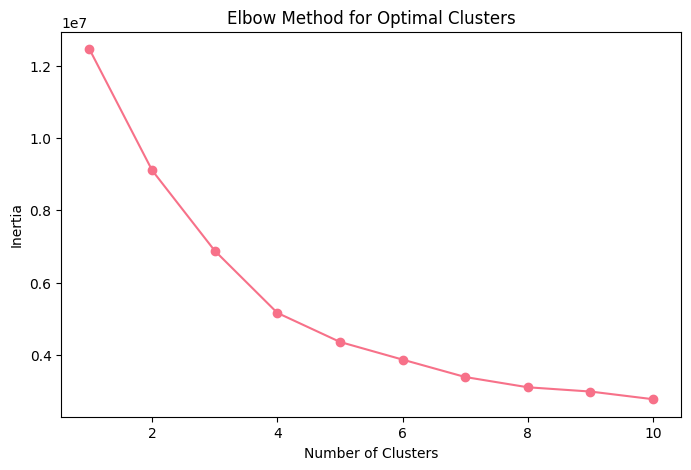

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X = data[features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The elbow curve shows how inertia (within-cluster sum of squared distances) decreases as the number of clusters increases.

Initially, inertia drops steeply, but after a certain point, the rate of decrease slows — this “elbow point” indicates the optimal number of clusters.

Choosing clusters beyond the elbow adds complexity without significantly improving cluster compactness.

In this dataset, the elbow is likely around k = 3–4, suggesting a few distinct patterns of household energy usage.

In [ ]:
# COMPONENT 2: USER BEHAVIOR PROFILING

# Create daily profiles for clustering (sample for speed)
daily_sample = data[::60].copy()  # Every hour instead of every minute

daily_profiles = daily_sample.groupby('Date').agg({
    'Global_active_power': ['mean', 'max', 'std'],
    'Kitchen_Efficiency': 'mean',
    'Laundry_Efficiency': 'mean',
    'Climate_Efficiency': 'mean',
    'Is_Peak_Time': 'sum',
    'High_Night_Usage': 'sum'
}).reset_index()

# Flatten column names
daily_profiles.columns = ['Date', 'Avg_Power', 'Peak_Power', 'Power_Variability',
                         'Kitchen_Usage', 'Laundry_Usage', 'Climate_Usage',
                         'Peak_Hours_Active', 'Night_Alerts']

# Remove missing values
daily_clean = daily_profiles.dropna()

# User clustering (4 types for simplicity)
features_for_clustering = ['Avg_Power', 'Peak_Power', 'Kitchen_Usage',
                          'Laundry_Usage', 'Climate_Usage']
X_cluster = daily_clean[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
daily_clean['User_Type'] = kmeans.fit_predict(X_scaled)

# Define meaningful user categories
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_analysis = pd.DataFrame(cluster_centers, columns=features_for_clustering)
cluster_analysis['User_Category'] = ['Energy Saver', 'Moderate User', 'High Consumer', 'Variable User']

print(cluster_analysis[['User_Category', 'Avg_Power', 'Peak_Power']].round(3))


   User_Category  Avg_Power  Peak_Power
0   Energy Saver      1.549       5.193
1  Moderate User      0.607       1.941
2  High Consumer      1.104       3.324
3  Variable User      1.033       3.965


This step builds daily energy usage profiles to group users into behavior-based categories.

Aggregated metrics (average power, peak power, efficiency ratios, and alerts) give a compact yet descriptive picture of each day's usage.

Clustering (k=4) produces distinct user types:

1) Energy Saver – low average and peak consumption.

2) Moderate User – steady, mid-level usage.

3) High Consumer – consistently high energy demand.

4) Variable User – fluctuating daily usage patterns.

This profiling can personalize recommendations, target energy-saving tips, and even trigger custom alerts for vulnerable or high-consumption households.

In [ ]:
# COMPONENT 3: ACCESSIBILITY-FOCUSED INSIGHTS

# Key insights for elderly/specially-abled users
energy_insights = {
    'Daily Peak Hours': '7-9 AM, 6-9 PM',
    'Lowest Cost Hours': '2-6 AM, 10 AM-4 PM',
    'Weekend vs Weekday': f"{data[data['IsWeekend']==True]['Global_active_power'].mean():.2f} vs {data[data['IsWeekend']==False]['Global_active_power'].mean():.2f} kW",
    'Winter vs Summer': f"{data[data['Month'].isin([12,1,2])]['Global_active_power'].mean():.2f} vs {data[data['Month'].isin([6,7,8])]['Global_active_power'].mean():.2f} kW",
    'High Usage Alerts': f"{data['Extreme_Usage'].sum():,} instances above 6kW",
    'Night Safety Concerns': f"{data['High_Night_Usage'].sum():,} high usage during sleep hours"
}

print("Key Insights for Accessible Energy Management:")
for key, value in energy_insights.items():
    print(f"   {key}: {value}")


Key Insights for Accessible Energy Management:
   Daily Peak Hours: 7-9 AM, 6-9 PM
   Lowest Cost Hours: 2-6 AM, 10 AM-4 PM
   Weekend vs Weekday: 1.22 vs 1.03 kW
   Winter vs Summer: 1.41 vs 0.72 kW
   High Usage Alerts: 5,467 instances above 6kW
   Night Safety Concerns: 13,622 high usage during sleep hours


This component converts technical energy analytics into clear, actionable insights for elderly or specially-abled users.

It includes :

1) Daily Peak Hours – periods when usage (and possibly cost) is highest.

2) Lowest Cost Hours – ideal times to run appliances for savings.

3) Weekend vs Weekday Consumption – helps identify lifestyle-driven usage differences.

4) Winter vs Summer Usage – shows seasonal shifts, likely due to heating/cooling needs.

5) High Usage Alerts – counts of extreme consumption events (>6 kW), useful for cost and safety management.

6) Night Safety Concerns – high consumption during sleep hours, which may indicate unsafe appliance use or anomalies.

# 7. Machine Learning Prediction

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Prepare the data for Random Forest
feature_cols = ['Hour', 'Month', 'DayofWeek', 'Kitchen_Efficiency', 'Laundry_Efficiency', 'Climate_Efficiency']
model_data = data.dropna(subset=['Global_active_power', 'Hour', 'Month', 'DayofWeek'])
X = model_data[feature_cols]
y = model_data['Global_active_power']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimized Random Forest model
rf_optimized = RandomForestRegressor(
    n_estimators=50,       # Reduced number of trees
    max_depth=10,          # Limit tree depth
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Train the model
rf_optimized.fit(X_train, y_train)

# Predictions
y_pred_train = rf_optimized.predict(X_train)
y_pred_test = rf_optimized.predict(X_test)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Display results
print(f"Train Accuracy (R²): {r2_train:.4f}")
print(f"Test Accuracy  (R²): {r2_test:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Train Accuracy (R²): 0.8051
Test Accuracy  (R²): 0.8042
Test MAE: 0.2238
Test RMSE: 0.4657


In [ ]:
# Save the optimized model
joblib.dump(rf_optimized, 'rf_model_optimized.pkl')

['rf_model_optimized.pkl']

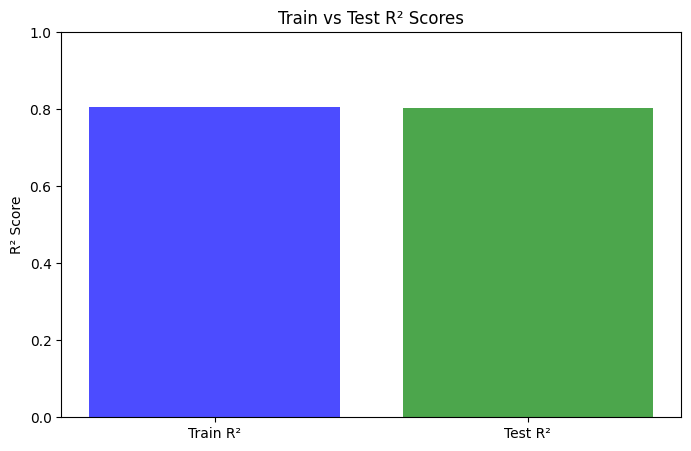

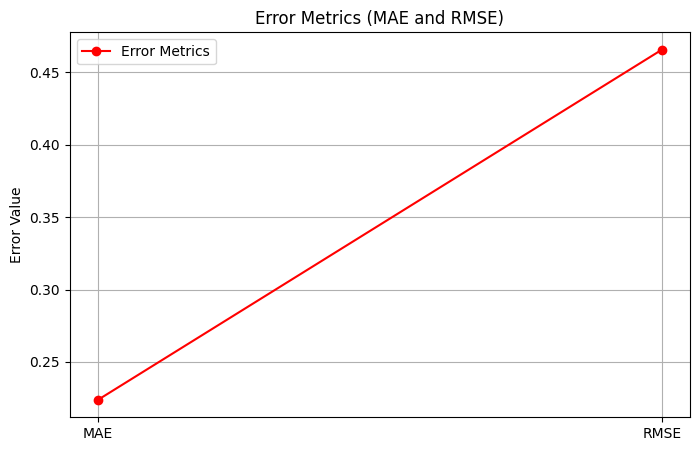

In [ ]:
import matplotlib.pyplot as plt

# Bar graph to compare Train and Test R² scores
plt.figure(figsize=(8, 5))
plt.bar(['Train R²', 'Test R²'], [r2_train, r2_test], color=['blue', 'green'], alpha=0.7)
plt.title('Train vs Test R² Scores')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.show()

# Line graph for MAE and RMSE
metrics = ['MAE', 'RMSE']
values = [mae, rmse]
plt.figure(figsize=(8, 5))
plt.plot(metrics, values, marker='o', color='red', label='Error Metrics')
plt.title('Error Metrics (MAE and RMSE)')
plt.ylabel('Error Value')
plt.legend()
plt.grid()
plt.show()

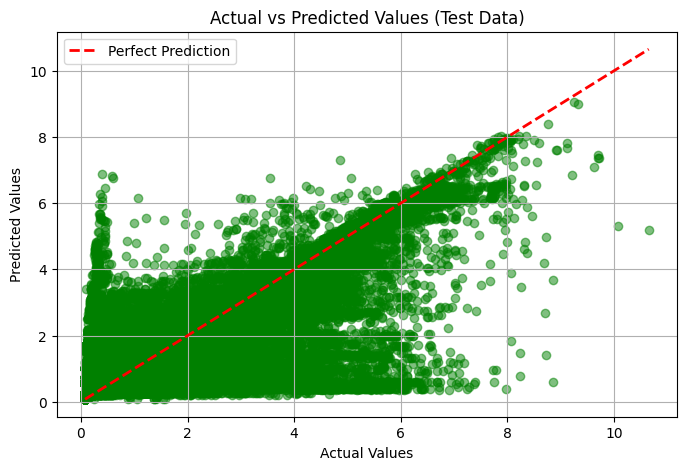

In [ ]:
# Scatter plot for actual vs predicted values (Test Data)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Values (Test Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

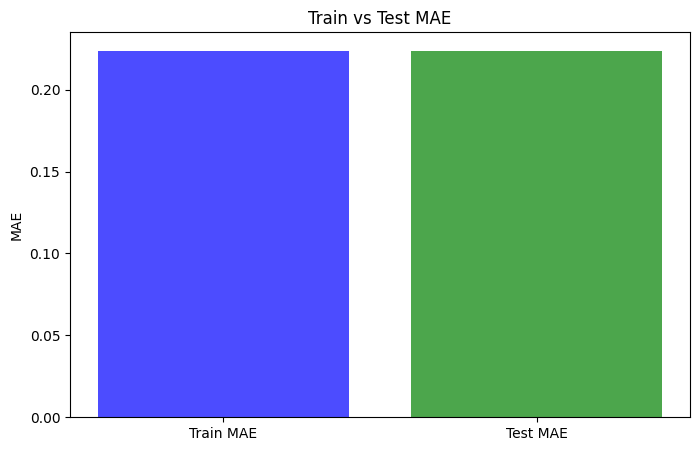

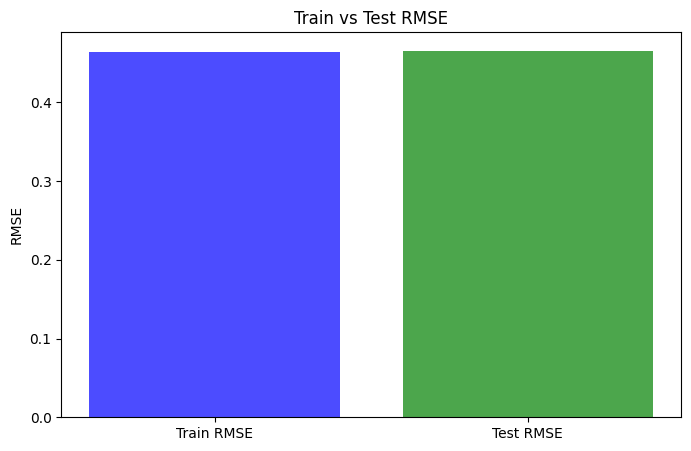

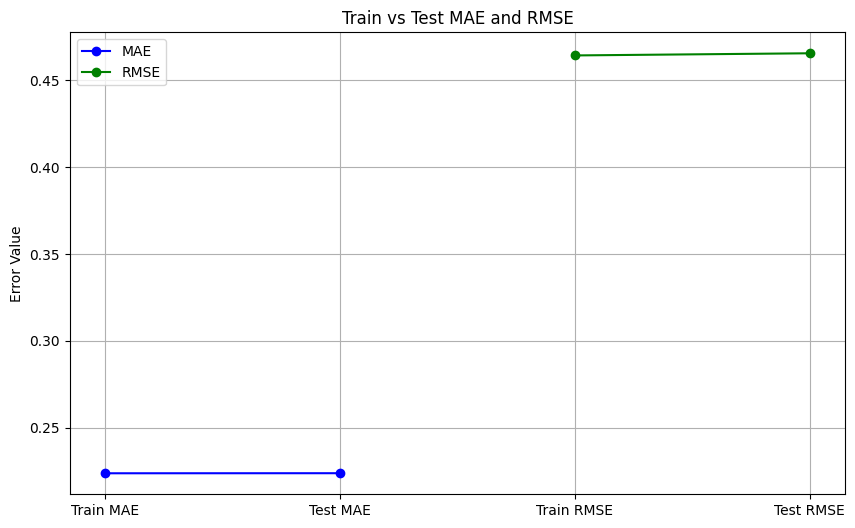

In [ ]:
# Calculate MAE and RMSE for the training set
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Create a bar graph to compare Train and Test MAE
plt.figure(figsize=(8, 5))
plt.bar(['Train MAE', 'Test MAE'], [mae_train, mae], color=['blue', 'green'], alpha=0.7)
plt.title('Train vs Test MAE')
plt.ylabel('MAE')
plt.show()

# Create a bar graph to compare Train and Test RMSE
plt.figure(figsize=(8, 5))
plt.bar(['Train RMSE', 'Test RMSE'], [rmse_train, rmse], color=['blue', 'green'], alpha=0.7)
plt.title('Train vs Test RMSE')
plt.ylabel('RMSE')
plt.show()

# Create a line chart to compare Train and Test MAE and RMSE
plt.figure(figsize=(10, 6))
plt.plot(['Train MAE', 'Test MAE'], [mae_train, mae], marker='o', linestyle='-', color='blue', label='MAE')
plt.plot(['Train RMSE', 'Test RMSE'], [rmse_train, rmse], marker='o', linestyle='-', color='green', label='RMSE')
plt.title('Train vs Test MAE and RMSE')
plt.ylabel('Error Value')
plt.legend()
plt.grid()
plt.show()

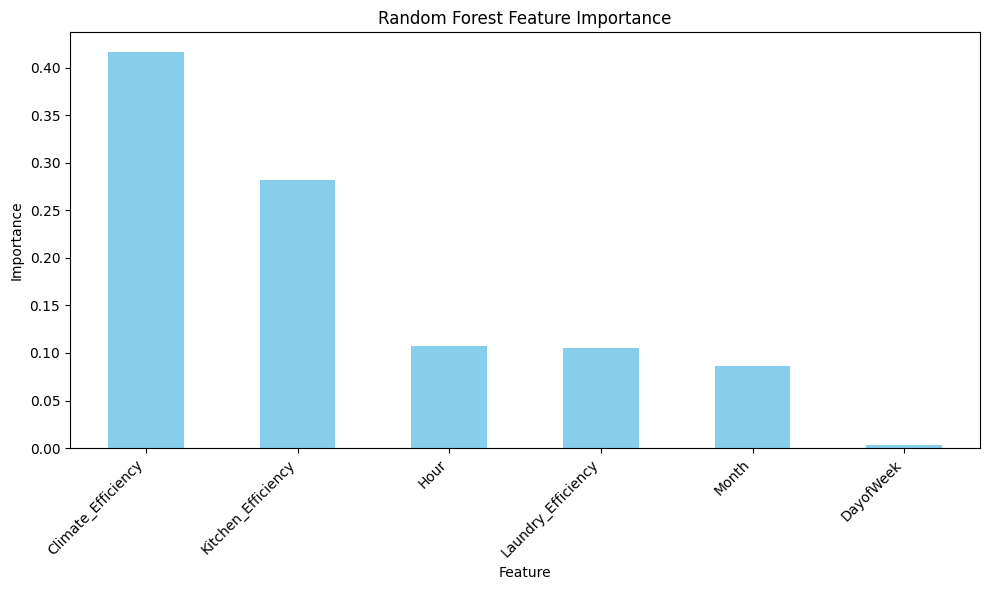

In [ ]:
# Get feature importances
feature_importances = rf_optimized.feature_importances_

# Create a pandas Series for easy visualization
feature_importances_series = pd.Series(feature_importances, index=feature_cols)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar', color='skyblue')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

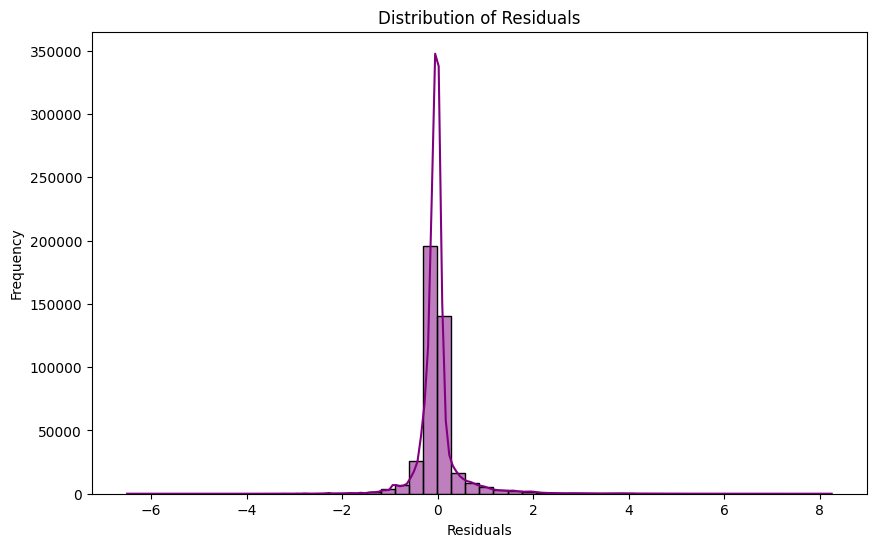

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_test

# Create a histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()